In [25]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap 
%matplotlib inline


In [26]:
base_df = pd.read_excel("/Users/anirudh/Documents/KamalLabs/Em_Pheno_MAPS/Base_mean _new.xlsx")

In [27]:
base_df = base_df.drop(base_df.columns[0], axis=1)

In [28]:
base_df
pheno = base_df.columns
print(pheno)

Index(['HR-mean', 'O2Sat-mean', 'Temp-mean', 'SBP-mean', 'MAP-mean',
       'DBP-mean', 'Resp-mean', 'EtCO2-mean', 'HCO3-mean', 'FiO2-mean',
       'pH-mean', 'PaCO2-mean', 'SaO2-mean', 'Chloride-mean',
       'Creatinine-mean', 'Bilirubin_direct-mean', 'Glucose-mean',
       'Lactate-mean', 'Magnesium-mean', 'Phosphate-mean', 'Potassium-mean',
       'Bilirubin_total-mean', 'TroponinI-mean', 'Hct-mean', 'Hgb-mean',
       'PTT-mean', 'WBC-mean', 'Fibrinogen-mean', 'Platelets-mean',
       'SOFA-mean', 'SIRS-mean'],
      dtype='object')


### Required labs 
#### Each lab has one umap -> has to have 4 clusters for the 4 phenos (best case, checking) 
 Data: Each patients' mean (for that lab) across 24 hours post sepsis onset, for the 4 phenotypes 
-- 4 excel sheets (each pheno), each row in this would be 24hrs mean for one csn 
-- scaled or unscaled, anythting works. 


UMAP Paras
bili, tropo, plat, HR, MAP, 

In [29]:
base_df = base_df.T 
print(base_df.shape)


(31, 1)


In [30]:
base_df

,0
HR-mean,87.489741
O2Sat-mean,96.454081
Temp-mean,36.840836
SBP-mean,123.334069
MAP-mean,85.017214
DBP-mean,68.263086
Resp-mean,19.185195
EtCO2-mean,6.831387
HCO3-mean,23.557945
FiO2-mean,0.419681


In [31]:
n_components = 2 
umap_reducer = umap.UMAP(n_neighbors=3, n_components=n_components, min_dist=0.1, random_state=42)

In [32]:
umap_result = umap_reducer.fit_transform(base_df)
# umap_result' contains the reduced-dimensional representation of your data


/Users/anirudh/anaconda3/envs/umap_env/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [33]:
print(umap_result)
print(len(umap_result))

[[10.212058   19.761257  ]
 [11.164025   20.236256  ]
 [-2.7387774  13.077437  ]
 [12.072934   19.844269  ]
 [ 9.854956   19.528732  ]
 [10.08057    19.343803  ]
 [-1.3391986  12.312181  ]
 [ 2.4472864   8.376719  ]
 [-1.566283   12.484153  ]
 [ 7.4802904   2.393991  ]
 [ 2.1936038   8.6938095 ]
 [-3.0544796  12.7471485 ]
 [10.917603   20.108955  ]
 [11.595265   20.088667  ]
 [ 5.383728   -0.6332745 ]
 [ 7.3696446   2.0260603 ]
 [12.382762   19.494236  ]
 [ 6.58058     0.16532552]
 [ 6.7460766   0.20106663]
 [ 4.7737827  -0.952789  ]
 [ 4.6819367  -0.641373  ]
 [ 7.230695    1.6271192 ]
 [ 7.549346    2.2739348 ]
 [-2.4510884  12.906803  ]
 [ 1.9561173   8.951844  ]
 [-2.953536   12.948603  ]
 [ 1.8574097   9.052957  ]
 [12.655541   19.702147  ]
 [12.483124   19.440544  ]
 [ 5.087614   -0.7975874 ]
 [ 6.8567524   0.4859582 ]]
31


In [12]:
# plt.figure(figsize=(10, 8))
# plt.scatter(umap_result[:, 0], umap_result[:, 1], s=10, cmap='viridis')
# plt.title('UMAP Visualization')
# plt.xlabel('UMAP Dimension 1')
# plt.ylabel('UMAP Dimension 2')
# plt.show()

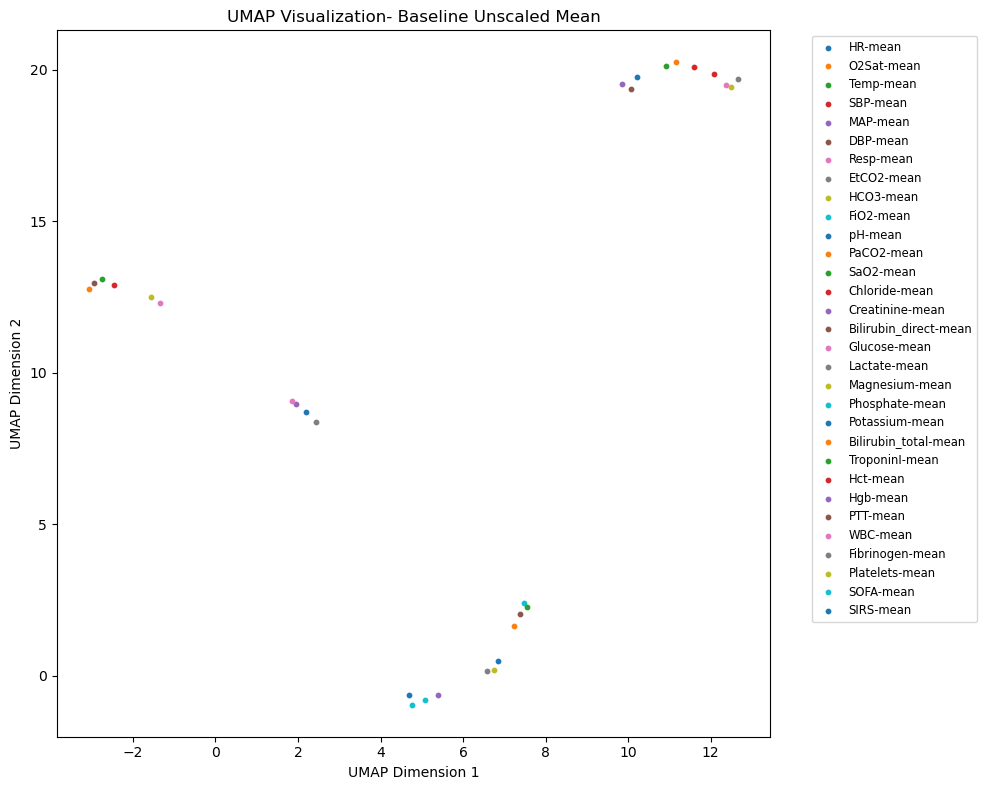

In [34]:
import matplotlib.pyplot as plt

# Assuming umap_result is a 2D array with shape (31, 2)
# If umap_result is a DataFrame, you can convert it to a NumPy array using umap_result.to_numpy()

# Create a list of labels for each of the 31 points
labels = ['HR-mean', 'O2Sat-mean', 'Temp-mean', 'SBP-mean', 'MAP-mean',
       'DBP-mean', 'Resp-mean', 'EtCO2-mean', 'HCO3-mean', 'FiO2-mean',
       'pH-mean', 'PaCO2-mean', 'SaO2-mean', 'Chloride-mean',
       'Creatinine-mean', 'Bilirubin_direct-mean', 'Glucose-mean',
       'Lactate-mean', 'Magnesium-mean', 'Phosphate-mean', 'Potassium-mean',
       'Bilirubin_total-mean', 'TroponinI-mean', 'Hct-mean', 'Hgb-mean',
       'PTT-mean', 'WBC-mean', 'Fibrinogen-mean', 'Platelets-mean',
       'SOFA-mean', 'SIRS-mean']

# Make sure the length of your umap_result matches the number of labels
if len(umap_result) != len(labels):
    raise ValueError("Number of data points and number of labels must match.")

# Create a scatter plot with different labels for each point
plt.figure(figsize=(10, 8))
for i in range(len(umap_result)):
    plt.scatter(umap_result[i, 0], umap_result[i, 1], s=10, label=labels[i])

# Move the legend to the side and set the font size
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.title('UMAP Visualization- Baseline Unscaled Mean')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.tight_layout()  # Ensures the legend does not overlap with the plot
plt.show()


In [14]:
pheno

Index(['HR-mean', 'O2Sat-mean', 'Temp-mean', 'SBP-mean', 'MAP-mean',
       'DBP-mean', 'Resp-mean', 'EtCO2-mean', 'HCO3-mean', 'FiO2-mean',
       'pH-mean', 'PaCO2-mean', 'SaO2-mean', 'Chloride-mean',
       'Creatinine-mean', 'Bilirubin_direct-mean', 'Glucose-mean',
       'Lactate-mean', 'Magnesium-mean', 'Phosphate-mean', 'Potassium-mean',
       'Bilirubin_total-mean', 'TroponinI-mean', 'Hct-mean', 'Hgb-mean',
       'PTT-mean', 'WBC-mean', 'Fibrinogen-mean', 'Platelets-mean',
       'SOFA-mean', 'SIRS-mean'],
      dtype='object')

## Scaled Data 

In [35]:
base_df_scaled = StandardScaler().fit_transform(base_df)

In [36]:
n_components = 2 
umap_reducer = umap.UMAP(n_neighbors=3, n_components=n_components, min_dist=0.1, random_state=42)
umap_result = umap_reducer.fit_transform(base_df_scaled)

/Users/anirudh/anaconda3/envs/umap_env/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [37]:
print(umap_result)
print(len(umap_result))

[[ 1.89932775e+00  9.99379444e+00]
 [ 2.59491301e+00  9.43073845e+00]
 [ 2.09187145e+01  1.13365822e+01]
 [ 3.17440963e+00  8.97173691e+00]
 [ 1.74347520e+00  1.01679897e+01]
 [ 1.59176207e+00  1.02191381e+01]
 [ 2.18614902e+01  1.00145283e+01]
 [ 3.94968653e+00  6.87862754e-01]
 [ 2.16788921e+01  1.02684851e+01]
 [-9.93902981e-01  1.41323125e+00]
 [ 4.40737247e+00  5.80365002e-01]
 [ 2.06673622e+01  1.16029253e+01]
 [ 2.40009832e+00  9.61102962e+00]
 [ 2.81424475e+00  9.19004536e+00]
 [ 2.32198119e+00  6.40937805e-01]
 [-5.71173191e-01  1.06356204e+00]
 [ 3.49153376e+00  8.64793301e+00]
 [ 1.31903565e+00  1.20812245e-02]
 [ 1.22161198e+00 -2.34292731e-01]
 [ 2.93641877e+00  8.93477142e-01]
 [ 3.21919584e+00  7.97202468e-01]
 [-2.20795825e-01  8.11194241e-01]
 [-8.98180366e-01  1.32069075e+00]
 [ 2.11652794e+01  1.10404587e+01]
 [ 4.86930370e+00  3.10554236e-01]
 [ 2.08055363e+01  1.14528723e+01]
 [ 4.81373215e+00  4.12629545e-01]
 [ 3.74797010e+00  8.43421268e+00]
 [ 3.54355645e+00  8

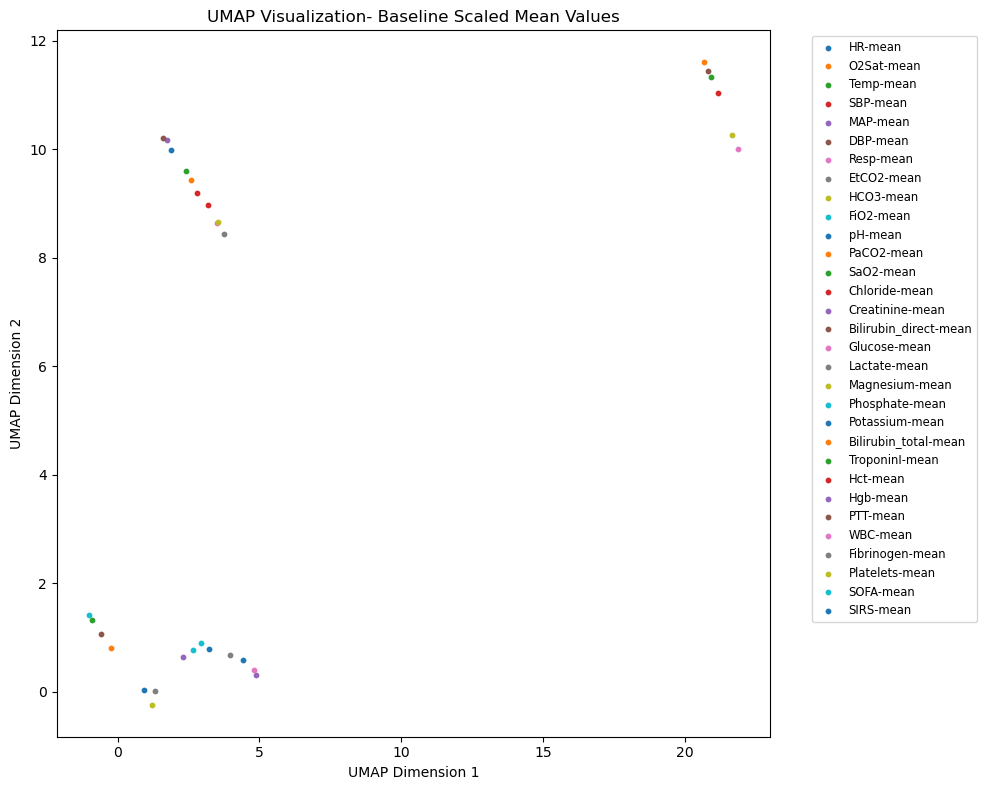

In [38]:
import matplotlib.pyplot as plt

# Assuming umap_result is a 2D array with shape (31, 2)
# If umap_result is a DataFrame, you can convert it to a NumPy array using umap_result.to_numpy()

# Create a list of labels for each of the 31 points
labels = ['HR-mean', 'O2Sat-mean', 'Temp-mean', 'SBP-mean', 'MAP-mean',
       'DBP-mean', 'Resp-mean', 'EtCO2-mean', 'HCO3-mean', 'FiO2-mean',
       'pH-mean', 'PaCO2-mean', 'SaO2-mean', 'Chloride-mean',
       'Creatinine-mean', 'Bilirubin_direct-mean', 'Glucose-mean',
       'Lactate-mean', 'Magnesium-mean', 'Phosphate-mean', 'Potassium-mean',
       'Bilirubin_total-mean', 'TroponinI-mean', 'Hct-mean', 'Hgb-mean',
       'PTT-mean', 'WBC-mean', 'Fibrinogen-mean', 'Platelets-mean',
       'SOFA-mean', 'SIRS-mean']

# Make sure the length of your umap_result matches the number of labels
if len(umap_result) != len(labels):
    raise ValueError("Number of data points and number of labels must match.")

# Create a scatter plot with different labels for each point
plt.figure(figsize=(10, 8))
for i in range(len(umap_result)):
    plt.scatter(umap_result[i, 0], umap_result[i, 1], s=10, label=labels[i])

# Move the legend to the side and set the font size
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.title('UMAP Visualization- Baseline Scaled Mean Values')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.tight_layout()  # Ensures the legend does not overlap with the plot
plt.show()
